In [57]:
from AnalysisTools.EventDisplay import EventDisplay
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')

E = 1
nMax=1000
time_bins=np.linspace(0,10,6)
eED = EventDisplay('SimulationOutputs/BatchOutput/electron_gun_E_%s_sim_output.root'%str(E),time_bins=time_bins)
pED = EventDisplay('SimulationOutputs/BatchOutput/proton_gun_E_%s_sim_output.root'%str(E),time_bins=time_bins)
ProcessString=None
e_template = eED.CalculateAvgTemplate(nMax=nMax,ProcessString=ProcessString,
                                      template_string='AverageTemplates/electron_gun_E_%s_template.json'%str(E))
p_template = pED.CalculateAvgTemplate(nMax=nMax,ProcessString=ProcessString,
                                      template_string='AverageTemplates/proton_gun_E_%s_template.json'%str(E))


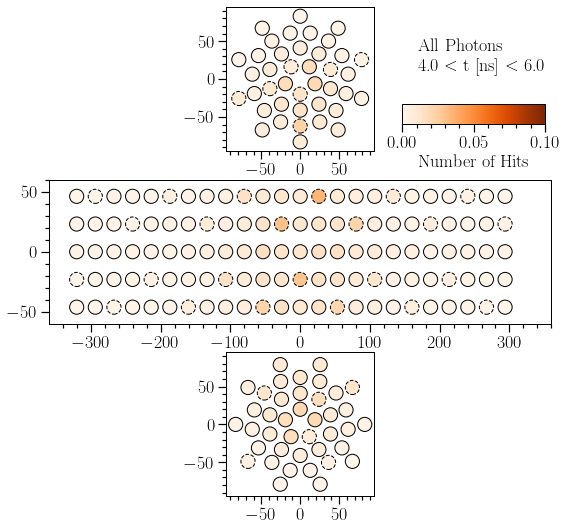

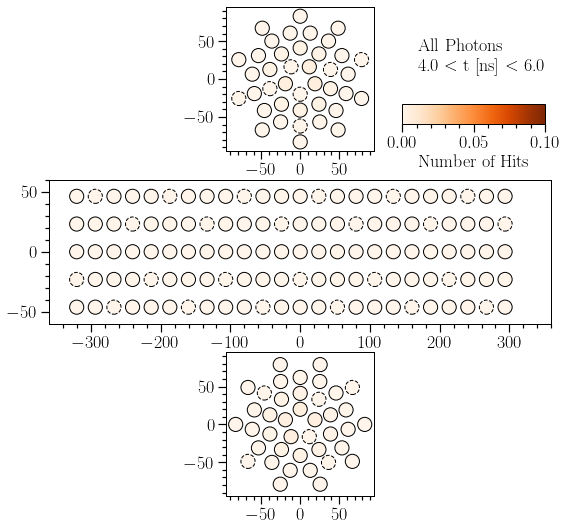

In [58]:
eED.PlotAvgTemplate(vmax=0.1,time_bin=2,ProcessString=ProcessString)
pED.PlotAvgTemplate(vmax=0.1,time_bin=2,ProcessString=ProcessString)

Electron
577.3544497814637


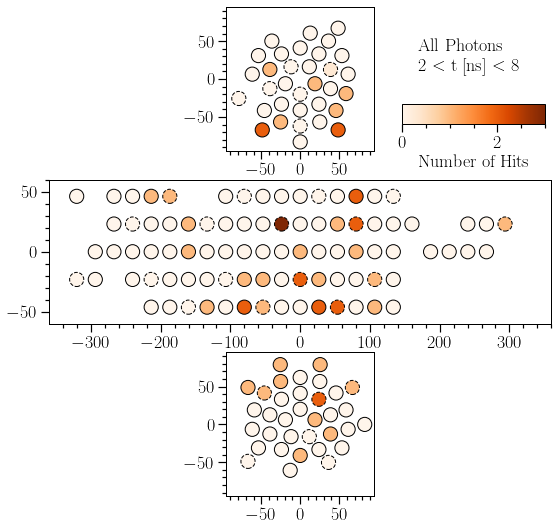

Proton
213.79662728843164


KeyboardInterrupt: 

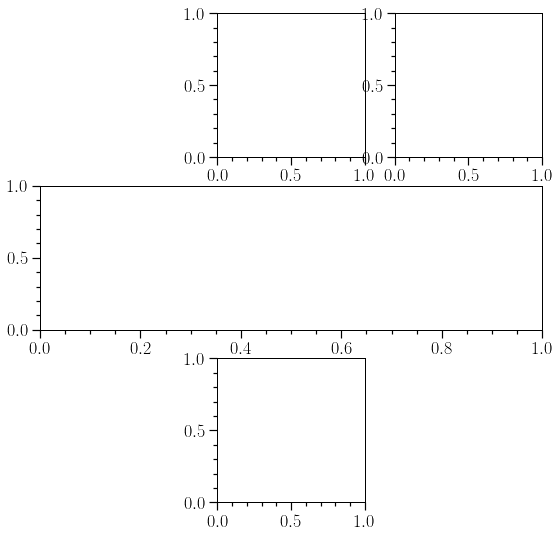

In [3]:
for evenno in range(1):
  for ProcessString in [None]:
    print('Electron')
    SaveStr = 'Figures/EventDisplays/electron_%s_E%s_event%i'%(ProcessString if ProcessString is not None else 'AllPhotons',E,evenno)
    eLLH = eED.MLE_dataset.LogLikelihood(evenno,template=e_template,prob_one=1./nMax)
    pLLH = eED.MLE_dataset.LogLikelihood(evenno,template=p_template,prob_one=1./nMax)
    print(eLLH-pLLH)
    eED.PlotAllPMTsTimeSlice(evenno,(2,8),ProcessString=ProcessString,vmax=3,SaveString=SaveStr,DetReco=True)
    print('Proton')
    SaveStr = 'Figures/EventDisplays/proton_%s_E%s_event%i'%(ProcessString if ProcessString is not None else 'AllPhotons',E,evenno)
    eLLH = pED.MLE_dataset.LogLikelihood(evenno,template=e_template,prob_one=1./nMax)
    pLLH = pED.MLE_dataset.LogLikelihood(evenno,template=p_template,prob_one=1./nMax)
    print(eLLH-pLLH)
    pED.PlotAllPMTsTimeSlice(evenno,(2,8),ProcessString=ProcessString,vmax=3,SaveString=SaveStr,DetReco=True)


In [26]:
gif = ED.PlotAllPMTsTimeGif(3,time_width=2,ProcessString='Cerenkov',SaveString='Figures/testED.mp4')

In [96]:
electron_dllh = []
proton_dllh = []
for evenno in range(1000):
  eLLH = eED.MLE_dataset.LogLikelihood(evenno,template=e_template,prob_one=1./nMax)
  pLLH = eED.MLE_dataset.LogLikelihood(evenno,template=p_template,prob_one=1./nMax)
  electron_dllh.append(eLLH-pLLH)
  eLLH = pED.MLE_dataset.LogLikelihood(evenno,template=e_template,prob_one=1./nMax)
  pLLH = pED.MLE_dataset.LogLikelihood(evenno,template=p_template,prob_one=1./nMax)
  proton_dllh.append(eLLH-pLLH)
    
    

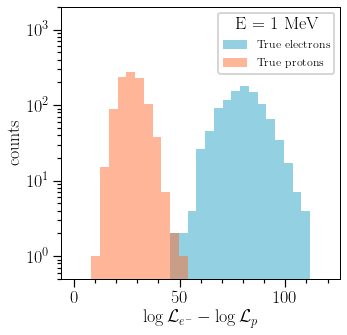

In [98]:
plt.hist(electron_dllh,bins=np.linspace(0,120,30),alpha=0.5,label='True electrons')
plt.hist(proton_dllh,bins=np.linspace(0,120,30),alpha=0.5,label='True protons')
plt.xlabel(r'$\log \mathcal{L}_{e^-} - \log \mathcal{L}_{p}$')
plt.ylabel('counts')
plt.legend(title='E = %s MeV'%str(E))
plt.semilogy()
plt.ylim(5e-1,2e3)
plt.show()